# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [64]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']#中文化的作法

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 27.3, 即時現金賣出: 27.97


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [35]:
'''

  Your code here
  
'''
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for price in rate_table:
    country=price.find(name="div" , attrs={'class':'visible-phone print_hide'}).get_text().replace(" ", "")
    buy_rate = price.find(name='td', attrs={'data-table':'本行現金買入'}).get_text()
    sell_rate = price.find(name='td', attrs={'data-table':'本行現金賣出'}).get_text()
    print(country)
    print(f"即時現金買入:{buy_rate}, 即時現金賣出:{sell_rate}")


美金(USD)

即時現金買入:27.3, 即時現金賣出:27.97

港幣(HKD)

即時現金買入:3.414, 即時現金賣出:3.618

英鎊(GBP)

即時現金買入:37.98, 即時現金賣出:40.1

澳幣(AUD)

即時現金買入:21.03, 即時現金賣出:21.81

加拿大幣(CAD)

即時現金買入:22.42, 即時現金賣出:23.33

新加坡幣(SGD)

即時現金買入:20.35, 即時現金賣出:21.26

瑞士法郎(CHF)

即時現金買入:29.99, 即時現金賣出:31.19

日圓(JPY)

即時現金買入:0.2438, 即時現金賣出:0.2566

南非幣(ZAR)

即時現金買入:-, 即時現金賣出:-

瑞典幣(SEK)

即時現金買入:2.96, 即時現金賣出:3.48

紐元(NZD)

即時現金買入:19.48, 即時現金賣出:20.33

泰幣(THB)

即時現金買入:0.7607, 即時現金賣出:0.9507

菲國比索(PHP)

即時現金買入:0.5081, 即時現金賣出:0.6411

印尼幣(IDR)

即時現金買入:0.00163, 即時現金賣出:0.00233

歐元(EUR)

即時現金買入:32.88, 即時現金賣出:34.22

韓元(KRW)

即時現金買入:0.02318, 即時現金賣出:0.02708

越南盾(VND)

即時現金買入:0.00083, 即時現金賣出:0.00133

馬來幣(MYR)

即時現金買入:5.599, 即時現金賣出:7.224

人民幣(CNY)

即時現金買入:4.233, 即時現金賣出:4.395


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)

https://rate.bot.com.tw/xrt/quote/2021-05/USD?Lang=zh-TW


<Figure size 720x576 with 0 Axes>

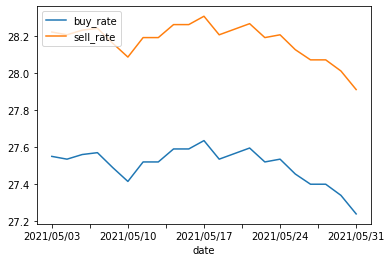

In [5]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2021-05")
print(quote_history_url)
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.td.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

In [6]:
'''

  Your code here

'''
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
url={}
for price in rate_table:
    # 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
    currency = price.find(name='div', attrs={'class':'visible-phone print_hide'}).get_text().replace(" ", "")
    

    # 針對美金，找到其「歷史匯率」的首頁 
    history_link = price.find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁
    url[currency]=history_rate_link

In [68]:
url

{'\r\n美金(USD)\r\n': 'https://rate.bot.com.tw/xrt/history/USD?Lang=zh-TW',
 '\r\n港幣(HKD)\r\n': 'https://rate.bot.com.tw/xrt/history/HKD?Lang=zh-TW',
 '\r\n英鎊(GBP)\r\n': 'https://rate.bot.com.tw/xrt/history/GBP?Lang=zh-TW',
 '\r\n澳幣(AUD)\r\n': 'https://rate.bot.com.tw/xrt/history/AUD?Lang=zh-TW',
 '\r\n加拿大幣(CAD)\r\n': 'https://rate.bot.com.tw/xrt/history/CAD?Lang=zh-TW',
 '\r\n新加坡幣(SGD)\r\n': 'https://rate.bot.com.tw/xrt/history/SGD?Lang=zh-TW',
 '\r\n瑞士法郎(CHF)\r\n': 'https://rate.bot.com.tw/xrt/history/CHF?Lang=zh-TW',
 '\r\n日圓(JPY)\r\n': 'https://rate.bot.com.tw/xrt/history/JPY?Lang=zh-TW',
 '\r\n南非幣(ZAR)\r\n': 'https://rate.bot.com.tw/xrt/history/ZAR?Lang=zh-TW',
 '\r\n瑞典幣(SEK)\r\n': 'https://rate.bot.com.tw/xrt/history/SEK?Lang=zh-TW',
 '\r\n紐元(NZD)\r\n': 'https://rate.bot.com.tw/xrt/history/NZD?Lang=zh-TW',
 '\r\n泰幣(THB)\r\n': 'https://rate.bot.com.tw/xrt/history/THB?Lang=zh-TW',
 '\r\n菲國比索(PHP)\r\n': 'https://rate.bot.com.tw/xrt/history/PHP?Lang=zh-TW',
 '\r\n印尼幣(IDR)\r\n': 'https:

In [69]:
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
df = []
for name , link in zip(url,url.values()):
    quote_history_url = link.replace("history", "quote/2021-05")
    print(quote_history_url)
    resp = requests.get(quote_history_url)
    resp.encoding = 'utf-8'
    history = BeautifulSoup(resp.text, "lxml")
    history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
    
    date_history = list()
    history_buy = list()
    history_sell = list()

    for history_rate in history_table:
        # 擷取日期資料
        
        date_string = history_rate.find(name = "td" , attrs={"class":"text-center"}).a.get_text()
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
        date_history.append(date)  # 日期歷史資料

        history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率
        # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
    df.append(HistoryExchangeRate)
    


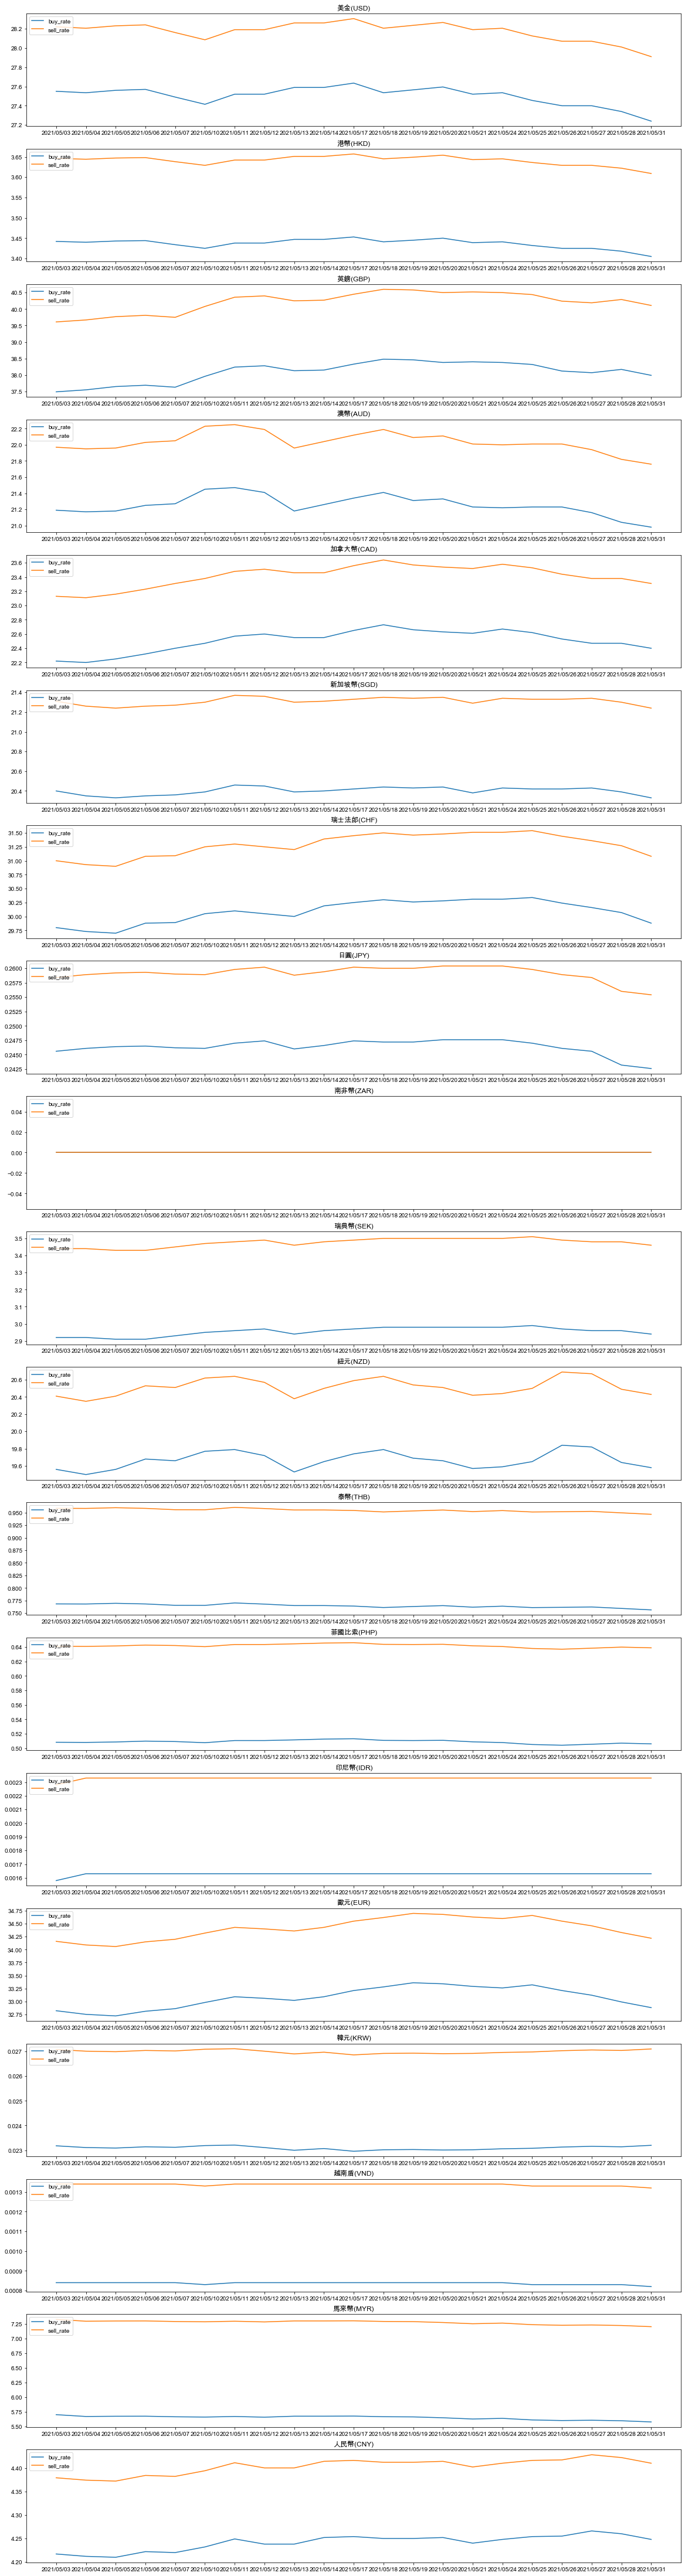

In [71]:
nrows = len(df)
ncols = 1
plt.figure(figsize=(20,80))
for i , df_  , name in zip(range(len(df)),df  ,url.keys() ):
    plt.subplot(nrows, ncols, i+1)
    for col in df_.columns:
        
        plt.plot(df_[col] , label =col )
    plt.legend(loc="upper left")
    plt.title(name.split("\n")[1].split("\r")[0])
    